In [1]:
import pandas as pd 
import numpy as np

from tensorflow import keras

import matplotlib.pyplot as plt

# loading dataset

In [2]:
df = pd.read_csv("customer-churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1568,3292-PBZEJ,Male,1,No,No,11,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.40,1183.05,No
1555,9651-GTSAQ,Female,0,Yes,No,53,Yes,No,Fiber optic,Yes,...,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),106.10,5769.75,Yes
4625,4480-QQRHC,Female,1,No,No,8,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.05,600.15,No
2397,3722-WPXTK,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,88.35,88.35,Yes
550,3580-HYCSP,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),110.30,7966.9,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Preprocessing 

In [4]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df = df[df.TotalCharges != ' ']
df.shape

(7032, 20)

In [6]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df = df[df.TotalCharges != 'nan']

In [8]:
df.shape

(7032, 20)

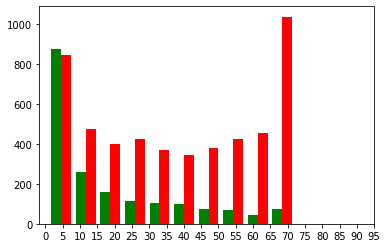

In [9]:
tenure_churn_no = df[df.Churn == 'No'].tenure
tenure_churn_yes = df[df.Churn == 'Yes'].tenure 

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Not leaving', 'leaving'])
plt.xticks([i for i in range(0,100,5)])
plt.show()

# performing one hot encoding on categorical features

In [10]:
for columns in df:
    if df[columns].dtype == 'object':
        print(f'{columns} --- {df[columns].unique()}')

gender --- ['Female' 'Male']
Partner --- ['Yes' 'No']
Dependents --- ['No' 'Yes']
PhoneService --- ['No' 'Yes']
MultipleLines --- ['No phone service' 'No' 'Yes']
InternetService --- ['DSL' 'Fiber optic' 'No']
OnlineSecurity --- ['No' 'Yes' 'No internet service']
OnlineBackup --- ['Yes' 'No' 'No internet service']
DeviceProtection --- ['No' 'Yes' 'No internet service']
TechSupport --- ['No' 'Yes' 'No internet service']
StreamingTV --- ['No' 'Yes' 'No internet service']
StreamingMovies --- ['No' 'Yes' 'No internet service']
Contract --- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --- ['Yes' 'No']
PaymentMethod --- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --- ['No' 'Yes']


In [11]:
"""
in column multiple_lines we have three values yes no and no phone service
in which no phone service is same as no value

same case with column OnlineSecurity, OnlineBackup, DeviceProtection, 
TechSupport, StreamingTV, StreamingMovies, 
"""


'\nin column multiple_lines we have three values yes no and no phone service\nin which no phone service is same as no value\n\nsame case with column OnlineSecurity, OnlineBackup, DeviceProtection, \nTechSupport, StreamingTV, StreamingMovies, \n'

In [12]:
df['MultipleLines'].replace({'No phone service' : 'No'}, inplace=True)
df['OnlineSecurity'].replace({'No internet service': 'No'}, inplace=True)
df['OnlineBackup'].replace({'No internet service': 'No'}, inplace=True)
df['DeviceProtection'].replace({'No internet service': 'No'}, inplace=True)
df['TechSupport'].replace({'No internet service': 'No'}, inplace=True)
df['StreamingMovies'].replace({'No internet service': 'No'}, inplace=True)
df['StreamingTV'].replace({'No internet service': 'No'}, inplace=True)

In [13]:
for columns in df:
    if df[columns].dtype == 'object':
        print(f'{columns} --- {df[columns].unique()}')

gender --- ['Female' 'Male']
Partner --- ['Yes' 'No']
Dependents --- ['No' 'Yes']
PhoneService --- ['No' 'Yes']
MultipleLines --- ['No' 'Yes']
InternetService --- ['DSL' 'Fiber optic' 'No']
OnlineSecurity --- ['No' 'Yes']
OnlineBackup --- ['Yes' 'No']
DeviceProtection --- ['No' 'Yes']
TechSupport --- ['No' 'Yes']
StreamingTV --- ['No' 'Yes']
StreamingMovies --- ['No' 'Yes']
Contract --- ['Month-to-month' 'One year' 'Two year']
PaperlessBilling --- ['Yes' 'No']
PaymentMethod --- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn --- ['No' 'Yes']


In [14]:


col_lst = ['Partner', 'Dependents',  
 'PhoneService', 'MultipleLines',  'OnlineSecurity', 
 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in col_lst:
    df[col_lst] = df[col_lst].replace({'Yes': 1, 'No': 0})

df['gender'] = df['gender'].replace({'Female': 0 , 'Male': 1})

In [15]:
for columns in df:
    if df[columns].dtype == 'object':
        print(f'{columns} --- {df[columns].unique()}')

InternetService --- ['DSL' 'Fiber optic' 'No']
Contract --- ['Month-to-month' 'One year' 'Two year']
PaymentMethod --- ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [16]:
df2 = pd.get_dummies(data=df , columns=['InternetService', 'Contract', 'PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


# Handling numerical feature

## scaling numerical feautures

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [18]:
col_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in col_to_scale:
    df2[col] = scaler.fit_transform(df2[col].to_numpy().reshape(-1, 1))
    
df2[['tenure', 'MonthlyCharges', 'TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


# train and test split

In [19]:
from sklearn.model_selection import train_test_split

X = df2.drop('Churn', axis='columns')
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
X_train.shape

(5625, 26)

In [21]:
y_train.shape

(5625,)

In [22]:
X_test.shape

(1407, 26)

In [23]:
y_test.shape

(1407,)

# Model building

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation = 'relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 3ms/step - loss: 0.5093 - accuracy: 0.7339
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4300 - accuracy: 0.7904
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4183 - accuracy: 0.8011
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8052
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4109 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4096 - accuracy: 0.8098
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4075 - accuracy: 0.8082
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4055 - accuracy: 0.8103
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8103
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4015 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8452
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3444 - accuracy: 0.8436
Epoch 83/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3435 - accuracy: 0.8448
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3421 - accuracy: 0.8476
Epoch 85/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3419 - accuracy: 0.8469
Epoch 86/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3405 - accuracy: 0.8489
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8434
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3395 - accuracy: 0.8478
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.8473
Epoch 90/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3375 - accuracy: 

In [28]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5174 - accuracy: 0.7633


[0.5173972845077515, 0.7633262276649475]

In [29]:
y_predict = model.predict(X_test)
y_predict

array([[0.49053204],
       [0.8794027 ],
       [0.00873579],
       ...,
       [0.68597305],
       [0.8071029 ],
       [0.64648604]], dtype=float32)

In [30]:
y_predict.shape

(1407, 1)

In [31]:
# converting proba score into class labels
y_predict_class = []
for i in y_predict:
    if i >= 0.5:
        y_predict_class.append(1)
    else:
        y_predict_class.append(0)
y_predict_class[:10]

[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [32]:
# genrating classification report 
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_predict_class))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       999
           1       0.61      0.51      0.56       408

    accuracy                           0.76      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.75      0.76      0.76      1407



Text(69.0, 0.5, 'Truth')

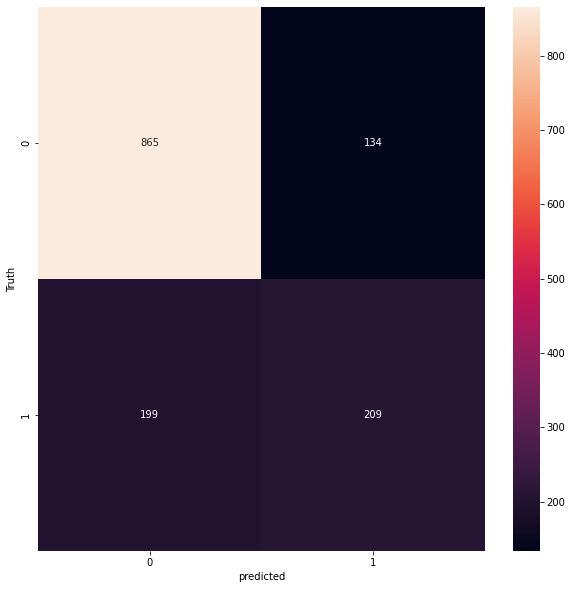

In [33]:
# plotting confusion matrix
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict_class)

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')